https://towardsdatascience.com/behind-the-models-cholesky-decomposition-b61ef17a65fb 

http://www.seas.ucla.edu/~vandenbe/133A/lectures/chol.pdf

https://mcsweeney90.github.io/files/modified-cholesky-decomposition-and-applications.pdf

Applications — Monte-Carlo Simulation

I saved the coolest application for last. Imagine that you want to generate many correlated normal random variables, but don’t want to deal with a massive multi-variate normal. Cholesky decomposition allows you to simulate uncorrelated normal variables and transform them into correlated noraml variables — cool!

Assume 3 Normal(0,1) random variables we want to follow the covariance matrix below, representing the underlying correlation and standard deviation matrices:

We find the Cholesky decomposition of the covariance matrix, and multiply that by the matrix of uncorrelated random variables to create correlated variables.

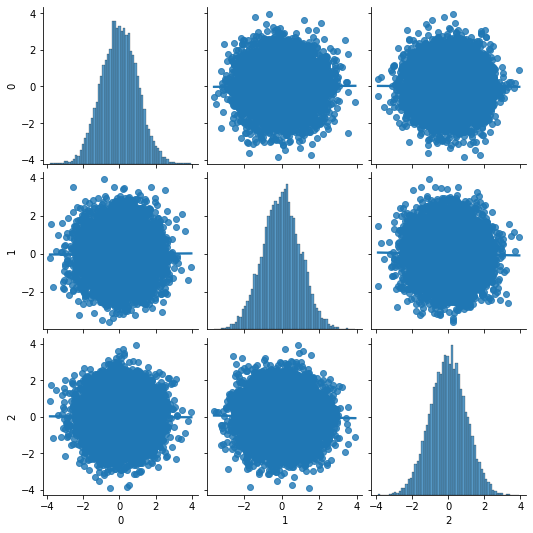

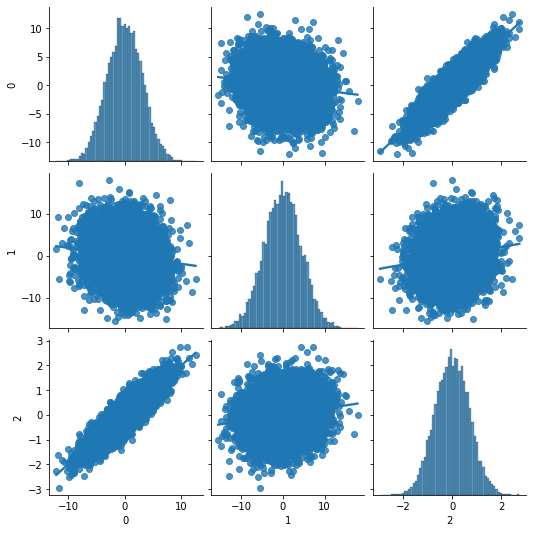

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

x_uncor = np.random.normal(0, 1, (3, 10000))
cov = np.array([[ 10.0, -2.00,  2.00], 
                [-2.00, 20.00,  0.50],
                [ 2.00,  0.50,  0.50]])

L = np.linalg.cholesky(cov)
x_cor = np.dot(L, x_uncor)
corr_simulated = pd.DataFrame(x_cor).T.corr()

std_ = np.sqrt(np.diag(cov))
corr_empirical = cov / np.outer(std_, std_)

x_uncor = pd.DataFrame(x_uncor.T)
x_cor = pd.DataFrame(x_cor.T)

sns.pairplot(x_uncor, kind="reg")
sns.pairplot(x_cor, kind="reg")

In [ ]:
x_uncor

,0,1,2
0,-0.390588,1.829395,-0.431706
1,-0.912037,-0.361503,-0.366423
2,0.057435,1.253378,0.783010
3,-2.358082,0.206911,0.407874
4,0.196921,1.081377,0.989961
...,...,...,...
9995,-0.484864,1.082331,-0.783321
9996,0.412917,0.168500,-0.165272
9997,0.935635,-1.647566,-1.109331
9998,0.455353,-0.195525,-0.413220


In [ ]:
x_cor

,0,1,2
0,-1.235149,8.346106,0.020296
1,-2.884113,-1.023621,-0.739069
2,0.181626,5.512616,0.480789
3,-7.456912,2.407414,-1.350522
4,0.622718,4.662916,0.584170
...,...,...,...
9995,-1.533276,5.098339,-0.276370
9996,1.305760,0.484828,0.255373
9997,2.958737,-7.885833,-0.011894
9998,1.439953,-1.153615,0.148150


Consistent with the correlation and standard deviation matrices presented above, columns 0 and 2 have a strongly positive correlation, 0 and 1 slightly negative, 1 and 2 slightly positive. The standard deviation of variable 2 is contained, while 0 and 1 are much wider.

Note that this does not work in the same way for non-normal random variables. In the above example, our correlated variables maintained a normal distribution. If we apply this method to gamma-generated random variables we see that the process does not hold.

Uncorrelated Gamma(1, 5) — everything looks good.

In [ ]:
corr_empirical

array([[ 1.        , -0.14142136,  0.89442719],
       [-0.14142136,  1.        ,  0.15811388],
       [ 0.89442719,  0.15811388,  1.        ]])

In [ ]:
corr_simulated

,0,1,2
0,1.000000,-0.132598,0.893742
1,-0.132598,1.000000,0.163045
2,0.893742,0.163045,1.000000
